In [2]:
import numpy as np                 #import libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [3]:
df=pd.read_csv('messages.csv')                    #load the data

In [4]:
print(df)                         

                                                subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are res

In [5]:
df.head(5)                            #print the first five rows of data

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [6]:
df.shape                               #print the shape of data

(2893, 3)

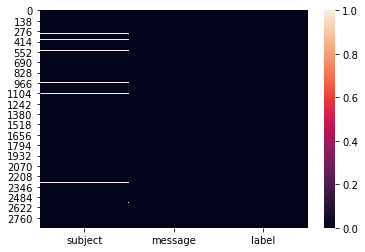

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.show()

In [8]:
df.columns                              #get the columns names

Index(['subject', 'message', 'label'], dtype='object')

In [9]:
df.drop_duplicates(inplace=True)           #check for duplicates and remove them

In [10]:
df.shape

(2876, 3)

In [11]:
df.isnull().sum()                          #check the NAN VALUES

subject    62
message     0
label       0
dtype: int64

In [12]:
df1 =  df.dropna()                         #drop the columns of NAN values

In [13]:
df1

subject  \
0               job posting - apple-iss research center   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
5     call for abstracts : optimality in syntactic t...   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are researching the differin...      0  
4     earlier this morning i was on the phone with a...      0  
5     content - length : 4437 call for papers is the...      0  
...                                                 ...    ...  
2888  hello thanks for stopping by ! ! we have taken...      1  
2889  the list owner of : " kiddin " has invited you...      1  
2890  judging from the return post , i must have sou...      0  
2891  gotcha ! there are two separate fallacies in t...      0  
2892  hello ! i ' m working on a thesis concerning a...      0  

[2814 rows x 3 columns]

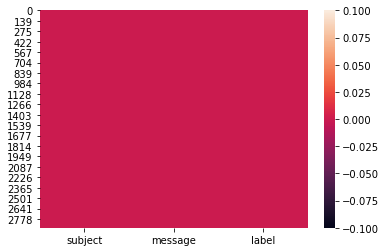

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df1.isnull())
plt.show()

In [15]:
df1.isnull().sum()                       #again check the shape

subject    0
message    0
label      0
dtype: int64

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
def process_text(text):
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc= ''.join(nopunc)
    clean_words= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [18]:
df['message'].head().apply(process_text)

0    [content, length, 3386, appleiss, research, ce...
1    [lang, classification, grimes, joseph, e, barb...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
Name: message, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['message'])

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(messages_bow,df['message'],test_size=0.20, random_state=0)

In [21]:
messages_bow.shape

(2876, 64661)

In [22]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
for m in model:
    score=cross_val_score(m,messages_bow,df['message'],cv=3)
    print('Score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('=======================================================================================')
    print('\n')

Score of LogisticRegression() is: [nan nan nan]
Mean score: nan
Standard deviation: nan


Score of DecisionTreeClassifier() is: [0.01251303 0.00834202 0.0125261 ]
Mean score: 0.011127051128270213
Standard deviation: 0.00196931953666546


Score of KNeighborsClassifier() is: [0.00312826 0.00312826 0.00417537]
Mean score: 0.0034772941832966523
Standard deviation: 0.0004936108518147735


Score of SVC() is: [0.00625652 0.00729927 0.00730689]
Mean score: 0.006954225543744463
Standard deviation: 0.0004933641031256425




In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
print(classifier.predict(x_train))
print(y_train.values)

['hm ! linguists agree with oscar wilde : the only thing worse than being talked about is not being talked about . ; - )\n'
 "final call for paper international conference on computational intelligence for modelling , control and automation cimca ' 99 17-19 february 1999 vienna - austria http : / / www-gscit . fcit . monash . edu . au / conferences / cimca99 14 august 1998 deadline for submission of extended abstract honorary chair : lotfi a . zadeh , university of california , usa general chair : masoud mohammadian , monash university ( australia ) second call for papers the international conference on computational intelligence for modelling , control and automation will be held in vienna , austria on 17-19 february 1999 . the conference provides a medium for the exchange of ideas between theoreticians and practitioners to address the important issue in computational intelligence , modelling , control and automation . the conference will consist of both plenary sessions and contribut

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred= classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ',accuracy_score(y_train,pred))



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Confusion Matrix: 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]

Accuracy:  0.8934782608695652


In [23]:
print(classifier.predict(x_test))
print(y_test.values)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['lomonosov state university of moscow philological faculty international conference " linguistics by the end of the xxth century : achievments and perspectives " . february 1 - 4 , 1995 . brief program arrival of the participants : january 31 , 1995 . registration of the participants : january 31 , 15 - 20 february 1 , 9 - 10 address : 119 899 russia , moscow , vorobjovy gory , mgu , 1 - st building of the humanities . location : metro station " universitet " . time - limits : 30 minutes for plenary talks 20 minutes for section talks 10 minutes for reports february , 1 ( 10 . 00 - 13 . 30 ) plenary meeting , chairs : a . e . kibrik , t . a . komova ( russia ) m . l . remnyova ( russia ) , a . e . kibrik ( russia ) , p . seriot ( france ) , d . geeraerts ( belgium ) , d . gil ( singapore ) , e . s . kubryakova ( russia ) ( 15 . 00 - 18 . 30 ) section i - history of linguistics , chair : v . s . vinogradov g . p . melnikov , l . murzin , v . rudelev , z . gabunia , a . karavanov , n . b

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred= classifier.predict(x_test)
print(classification_report(y_test,pred)) 
print()
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ',accuracy_score(y_test,pred))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Confusion Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]

Accuracy:  0.012152777777777778


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [43]:
lr=LogisticRegression()

In [45]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.0
[[0 0]
 [1 0]]
                                                                                                                                                                                                                                                                                                                                                                                                                              precision    recall  f1-score   support

                                                                                       everybody : the url for linguistics at the university of arizona is now : http : / / radon . gas . uug . arizona . edu / ~ weinberg / index . html there is also now massive amounts of information describing just about every aspect of our undergraduate and graduate offerings , our programs , our faculty , etc . mike hammond
       0.00      0.00      0.00       0.0
i am interested in the grammar of negative concord in various dialects o

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.0
[[0 0]
 [1 0]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     